# Task 1
Done by Nikita Matveev (group j4133c), Arina Shinkorenok (group j4132c), Fyodor Prazdnikov (group j4132c)

**Description:**

NOTE. For this lab you need subsample with 3-5 random variables, at least half of them should be described with continuous random variable type.

- Step 1. Choose subsample with main variables for your further analysis. Then for each of them:
- Step 2. You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function (or probability law in case of discrete RV).
- Step 3. You need to make an estimation of order statistics and represent them as “box with whiskers” plot.
- Step 4. Find one or several theoretical distributions that could describe your sample on a basis of non-parametric analysis results.
- Step 5. Estimate parameters of chosen distributions using methods of maximum likelihood and least squares method.
- Step 6. Validate your estimated parameters using QQ biplots.
- Step 7. Estimate correctness of fitted distributions using at least 2 statistical tests.

dataset: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

**Description:**

This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.

**Key Features:**

track_name: Name of the song
artist(s)_name: Name of the artist(s) of the song
artist_count: Number of artists contributing to the song
released_year: Year when the song was released
released_month: Month when the song was released
released_day: Day of the month when the song was released
in_spotify_playlists: Number of Spotify playlists the song is included in
in_spotify_charts: Presence and rank of the song on Spotify charts
streams: Total number of streams on Spotify
in_apple_playlists: Number of Apple Music playlists the song is included in
in_apple_charts: Presence and rank of the song on Apple Music charts
in_deezer_playlists: Number of Deezer playlists the song is included in
in_deezer_charts: Presence and rank of the song on Deezer charts
in_shazam_charts: Presence and rank of the song on Shazam charts
bpm: Beats per minute, a measure of song tempo
key: Key of the song
mode: Mode of the song (major or minor)
danceability_%: Percentage indicating how suitable the song is for dancing
valence_%: Positivity of the song's musical content
energy_%: Perceived energy level of the song
acousticness_%: Amount of acoustic sound in the song
instrumentalness_%: Amount of instrumental content in the song
liveness_%: Presence of live performance elements
speechiness_%: Amount of spoken words in the song

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import scipy.optimize
from scipy.optimize import minimize
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings(action='ignore')


In [2]:
df = pd.read_csv('./spotify-2023.csv', sep=',', encoding='windows-1251')


In [3]:
df


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

## Step 1. Choose subsample with main variables for your further analysis.

Let's choose three continuous variables and consider artist_cnt as categorical.

In [5]:
data = df[['artist_count', 'streams', 'in_spotify_playlists','in_apple_playlists']].copy().sample(300)


## Step 2. You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function (or probability law in case of discrete RV)

In [6]:
data['artist_count'] = pd.to_numeric(data['artist_count'], errors='coerce')
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
data['in_spotify_playlists'] = pd.to_numeric(data['in_spotify_playlists'], errors='coerce')
data['in_apple_playlists'] = pd.to_numeric(data['in_apple_playlists'], errors='coerce')


Let's write a function to clean the data from outliers.

In [7]:
def IQR(array):
    q75, q25 = np.percentile(array, [75, 25])
    interval = q75 - q25

    min_dist = q25 - (1.5 * interval)
    max_dist = q75 + (1.5 * interval)

    arr = [data for data in array if min_dist <= data <= max_dist]
    return arr


Let's visualize the distributions and their kernel density functions.

Because kernel density estimators assume that the input sample distribution is continious, we don't plot kde for artist_cnt which we view as categorical

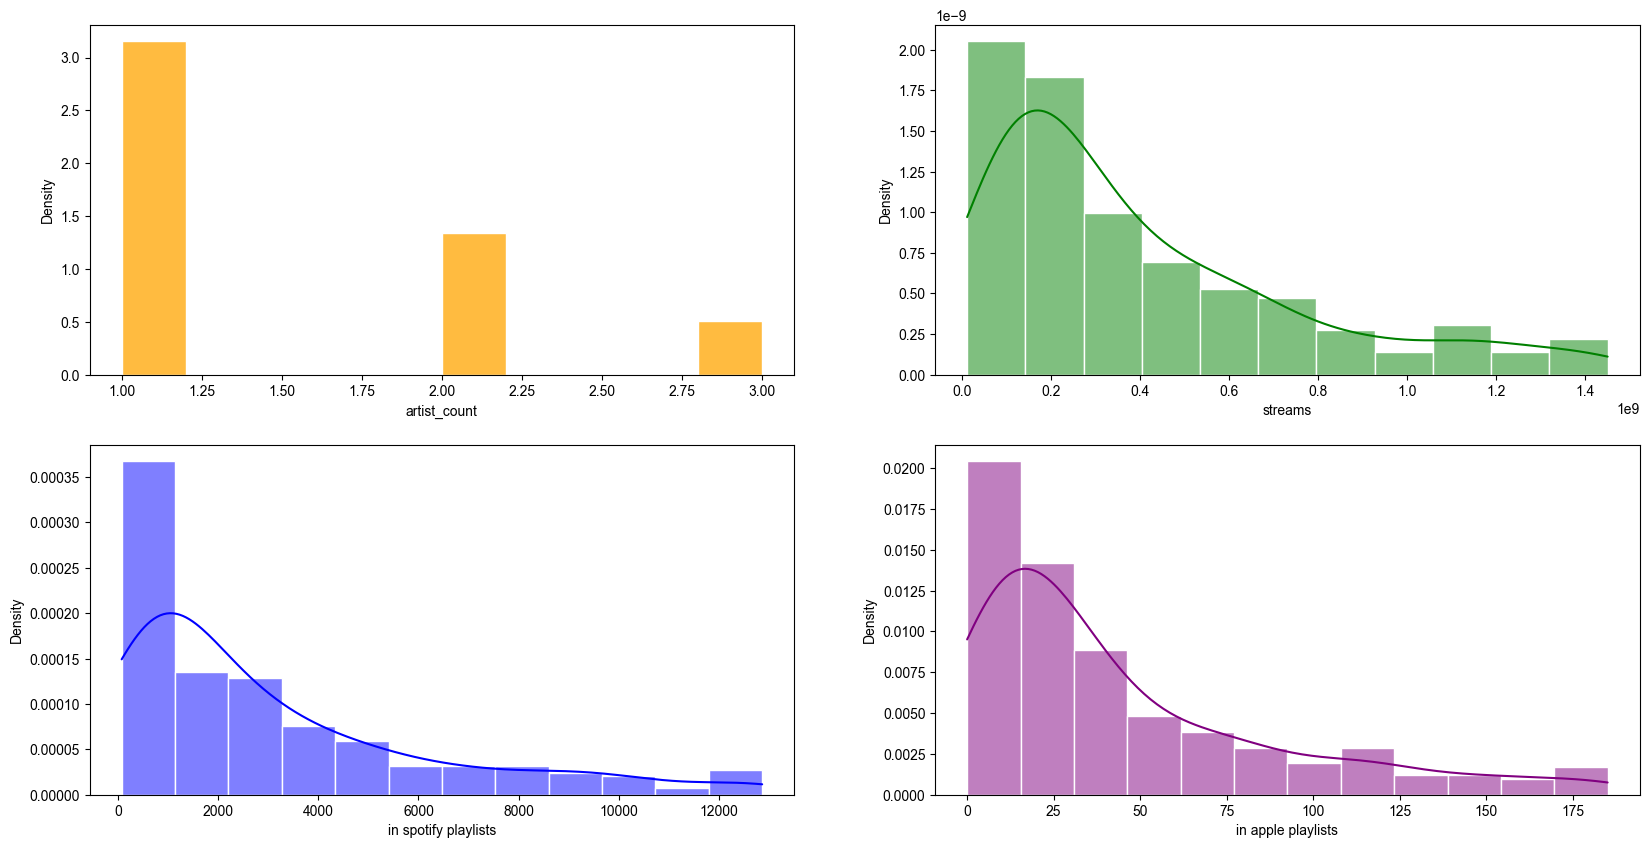

In [8]:
figure, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.set(style='whitegrid', palette='Set2')  # Здесь можно изменить цвета, используя другие палитры Seaborn

artist_count = sns.histplot(IQR(data['artist_count'].dropna()), ax=ax[0, 0], kde=False, stat='density', color='orange')
artist_count.set(xlabel='artist_count')

streams = sns.histplot(IQR(data['streams'].dropna()), ax=ax[0, 1], kde=True, stat='density', color='green')
streams.set(xlabel='streams')

in_spotify_playlists = sns.histplot(IQR(data['in_spotify_playlists'].dropna()), ax=ax[1, 0], kde=True, stat='density', color='blue')
in_spotify_playlists.set(xlabel='in spotify playlists')

in_apple_playlists = sns.histplot(IQR(data['in_apple_playlists'].dropna()), ax=ax[1, 1], kde=True, stat='density', color='purple')
in_apple_playlists.set(xlabel='in apple playlists')

plt.show()


## Step 3. You need to make an estimation of order statistics and represent them as “box with whiskers” plot. 

In [9]:
def return_quantile(array):
    quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
    return np.quantile(array, quantiles)

def plot_box(array, label):
    fig, ax = plt.subplots(2, 1, figsize=(12, 10))
    sns.set(style='whitegrid', palette='colorblind')

    sns.histplot(array, ax=ax[0], kde=False, stat='density')
    sns.boxplot(x=array, ax=ax[1], width=0.3)

    ax[0].set_xlabel(label)
    ax[1].set_xlabel(label)

    quantiles = return_quantile(array)
    for quantile in quantiles:
        for axes in ax:
            axes.axvline(quantile, color='black', alpha=0.75)

    plt.show()


On our dataset, let's calculate the order statistics and display them in a box plot format.

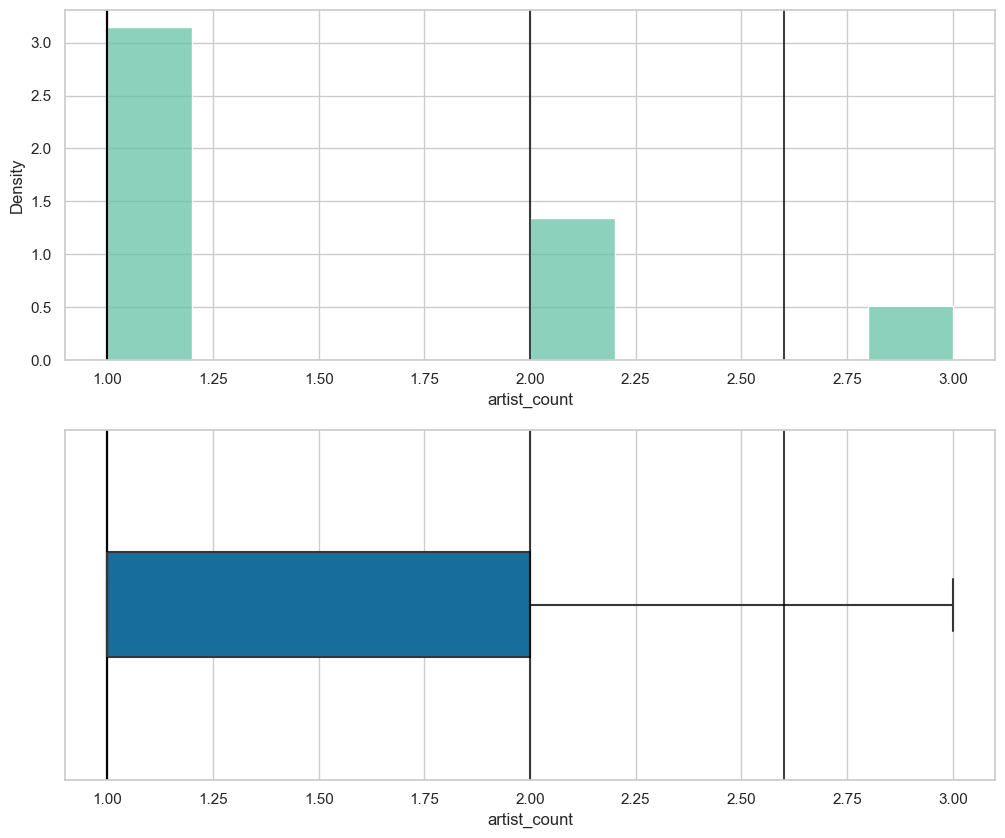

In [10]:
plot_box(IQR(data.artist_count), 'artist_count')


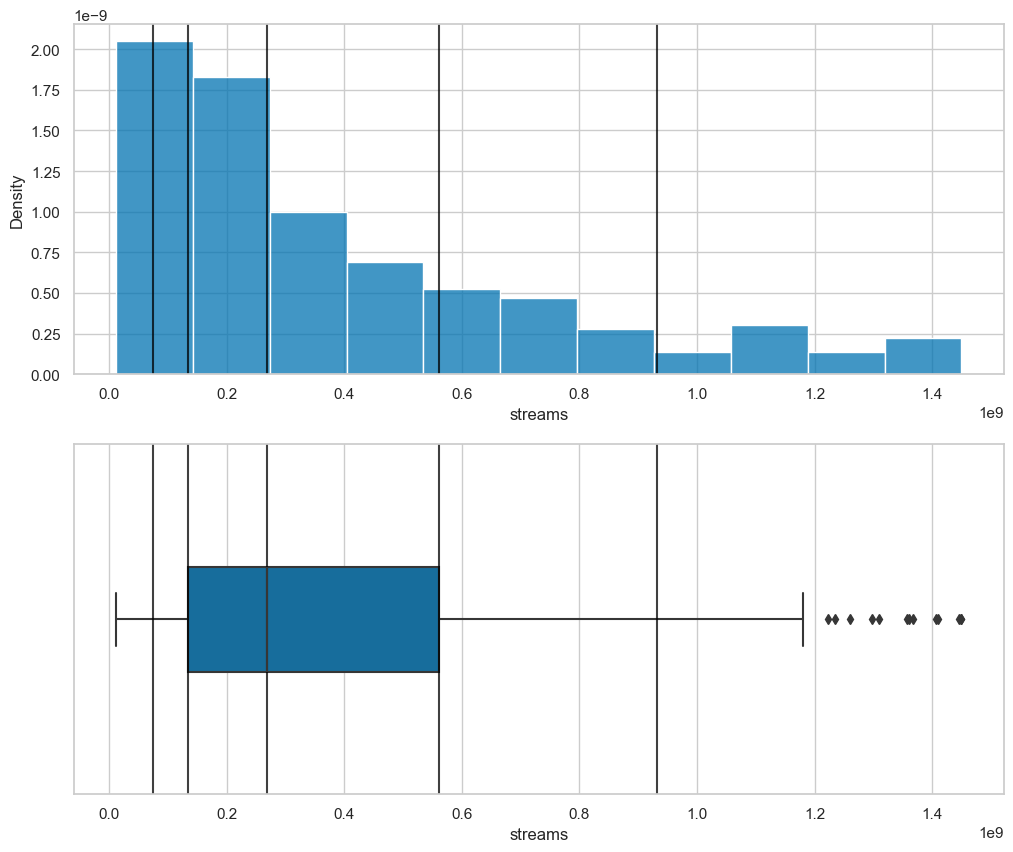

In [11]:
plot_box(IQR(data.streams), 'streams')


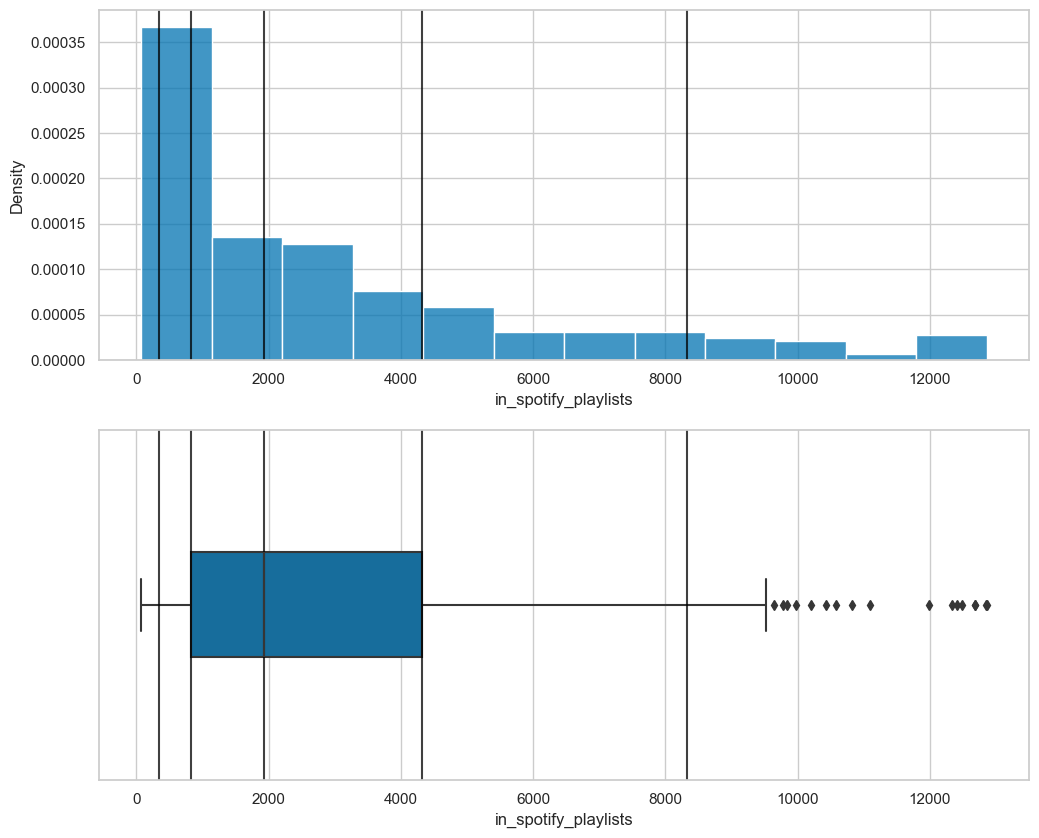

In [15]:
plot_box(IQR(data.in_spotify_playlists), 'in_spotify_playlists')


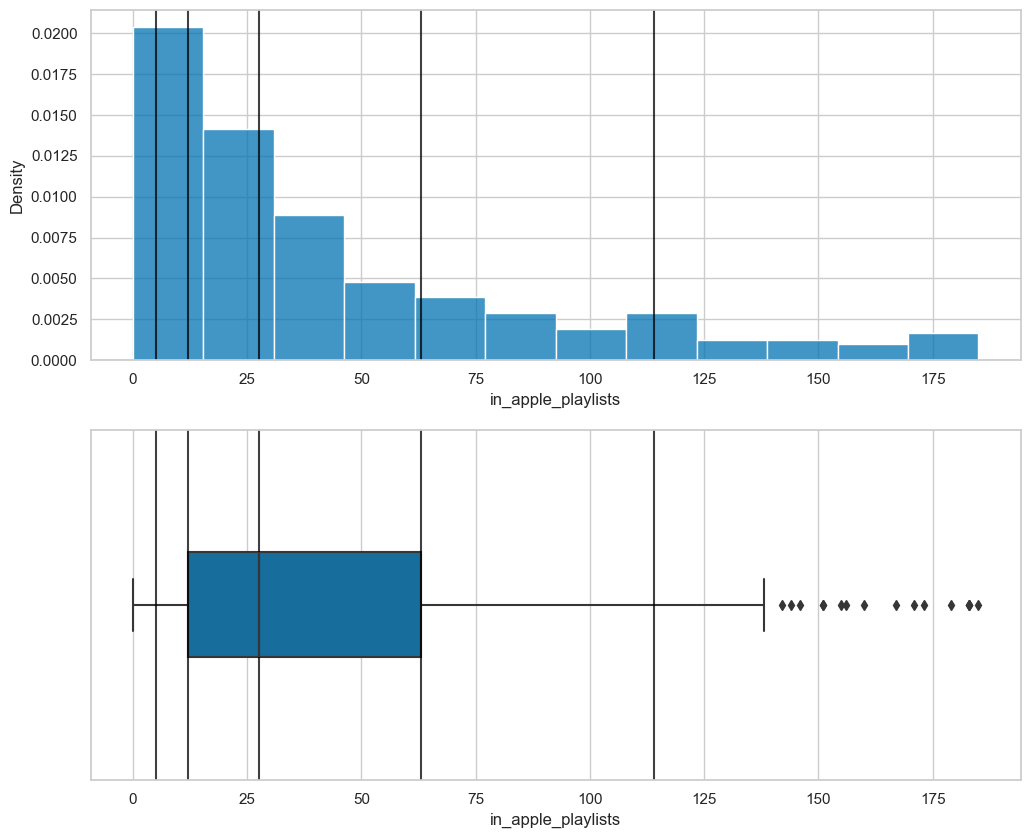

In [14]:
plot_box(IQR(data.in_apple_playlists), 'in_apple_playlists')


 ## Step 4. Find one or several theoretical distributions that could describe your sample on a basis of non-parametric analysis results.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm, expon, gamma, beta, lognorm, uniform, t, triang, chi2, cauchy, gumbel_r, weibull_min, geom


In [11]:
# Function to plot data and distribution
def plot_data_and_distribution(data, distribution, params, title, col_name):
    # Generate data from the given distribution
    distribution_data = distribution.rvs(*params, size=len(data))

    # Plotting code
    figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=False)
    sns.set(style='whitegrid', palette='Set2')
    # Plot histogram and KDE of the data on the first axis
    sns.histplot(data, ax=ax1, kde=True, stat='density', color='green', label='Data')
    ax1.set(xlabel=col_name)
    ax1.set_title('Data Distribution')

    # Plot the fitted distribution on the second axis
    sns.histplot(distribution_data, ax=ax2, kde=True, stat='density', color='blue', label='Fitted Distribution')
    ax2.set(xlabel=col_name)
    ax2.set_title(f'{title} (params={params})')

    plt.show()


For each distribution, let's visually find a similar one.

#### 4.1. Streams count

The number of listens is well described by the Weibull minimum continuous random variable.

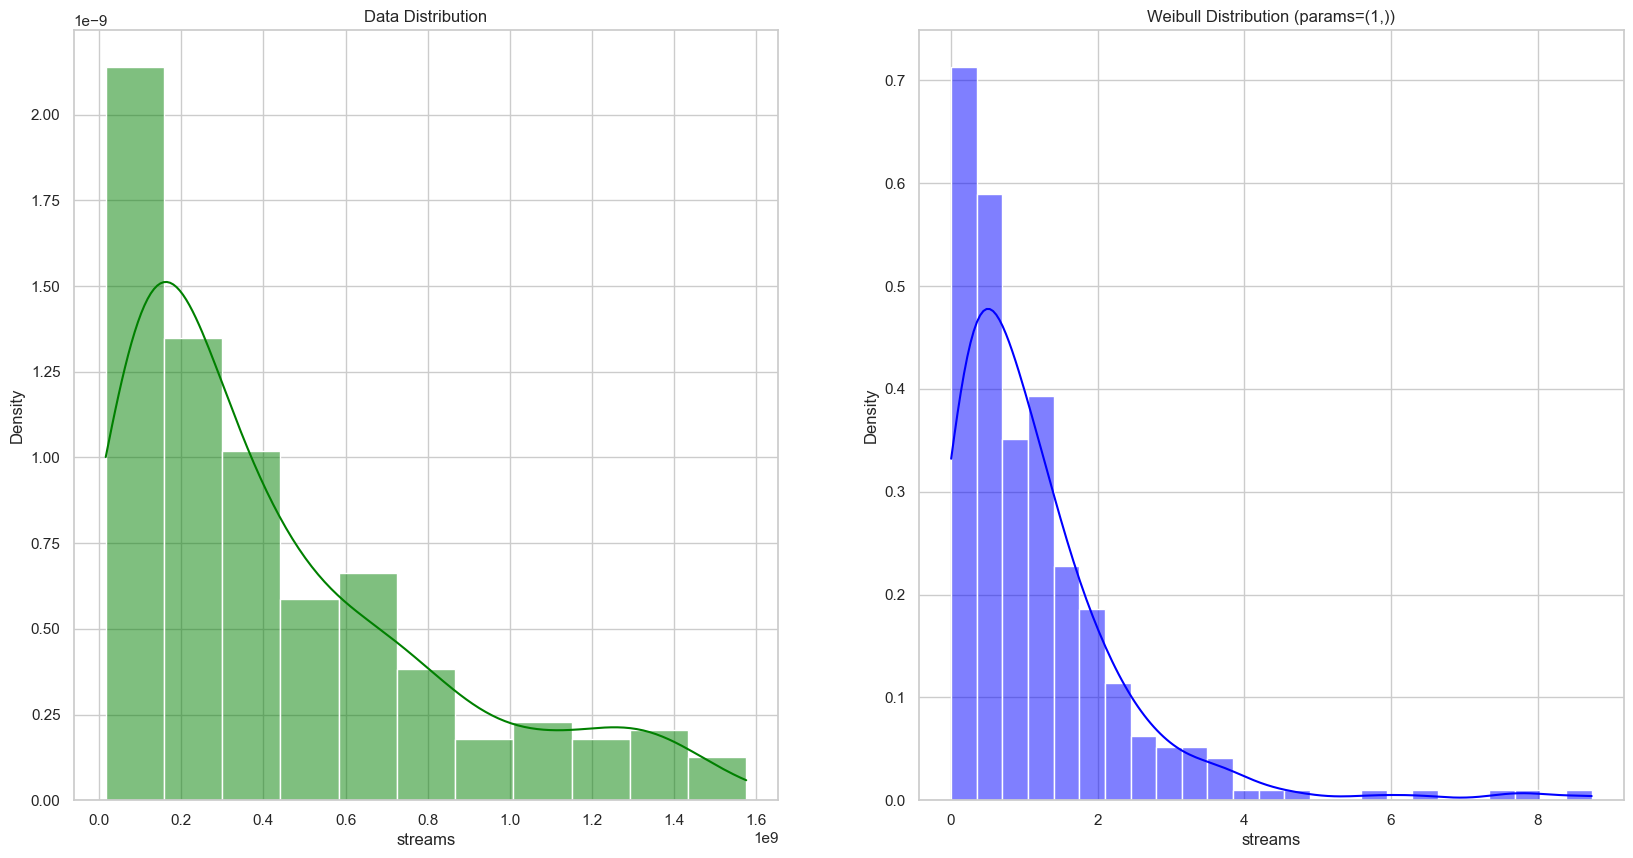

In [12]:
streams_sample = IQR(data['streams'].dropna())
plot_data_and_distribution(streams_sample, weibull_min, (1,), 'Weibull Distribution', 'streams')


### 4.2 In spotify playlist

The number of additions to Spotify playlists appears to resemble a gamma distribution. 

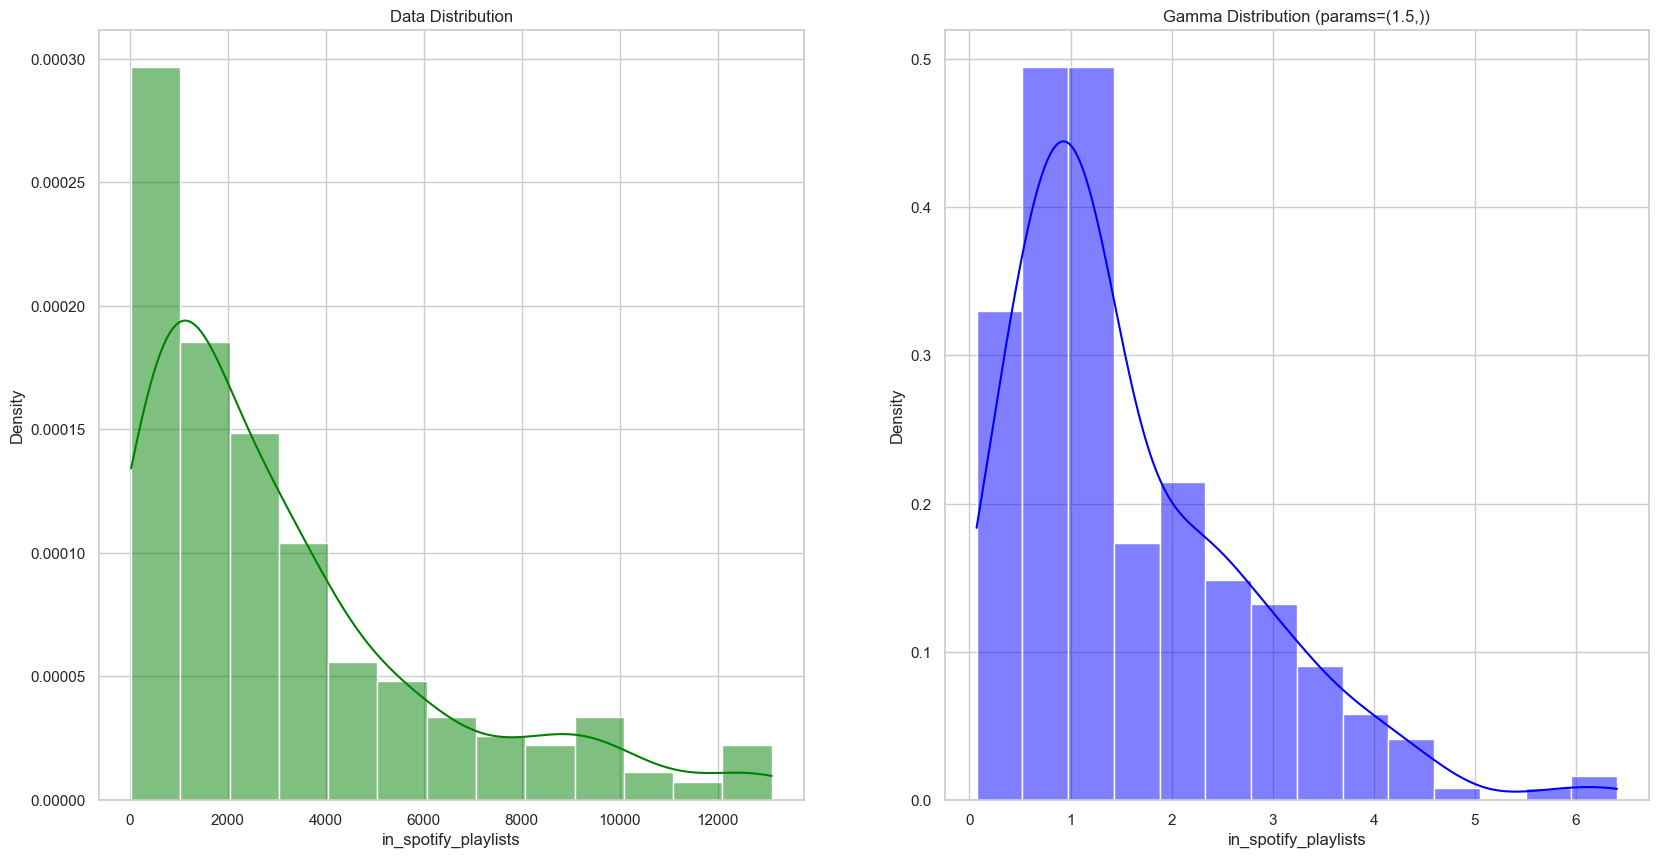

In [13]:
in_spot_sample = IQR(data['in_spotify_playlists'].dropna())
plot_data_and_distribution(in_spot_sample, gamma, (1.5,), 'Gamma Distribution', 'in_spotify_playlists')


### 4.3 In apple playlist

Similarly, the number of additions to Apple Music playlists looks identical, which is logical since the features have very similar meanings. However, for the sake of curiosity, let's choose another similar distribution - chi-square.

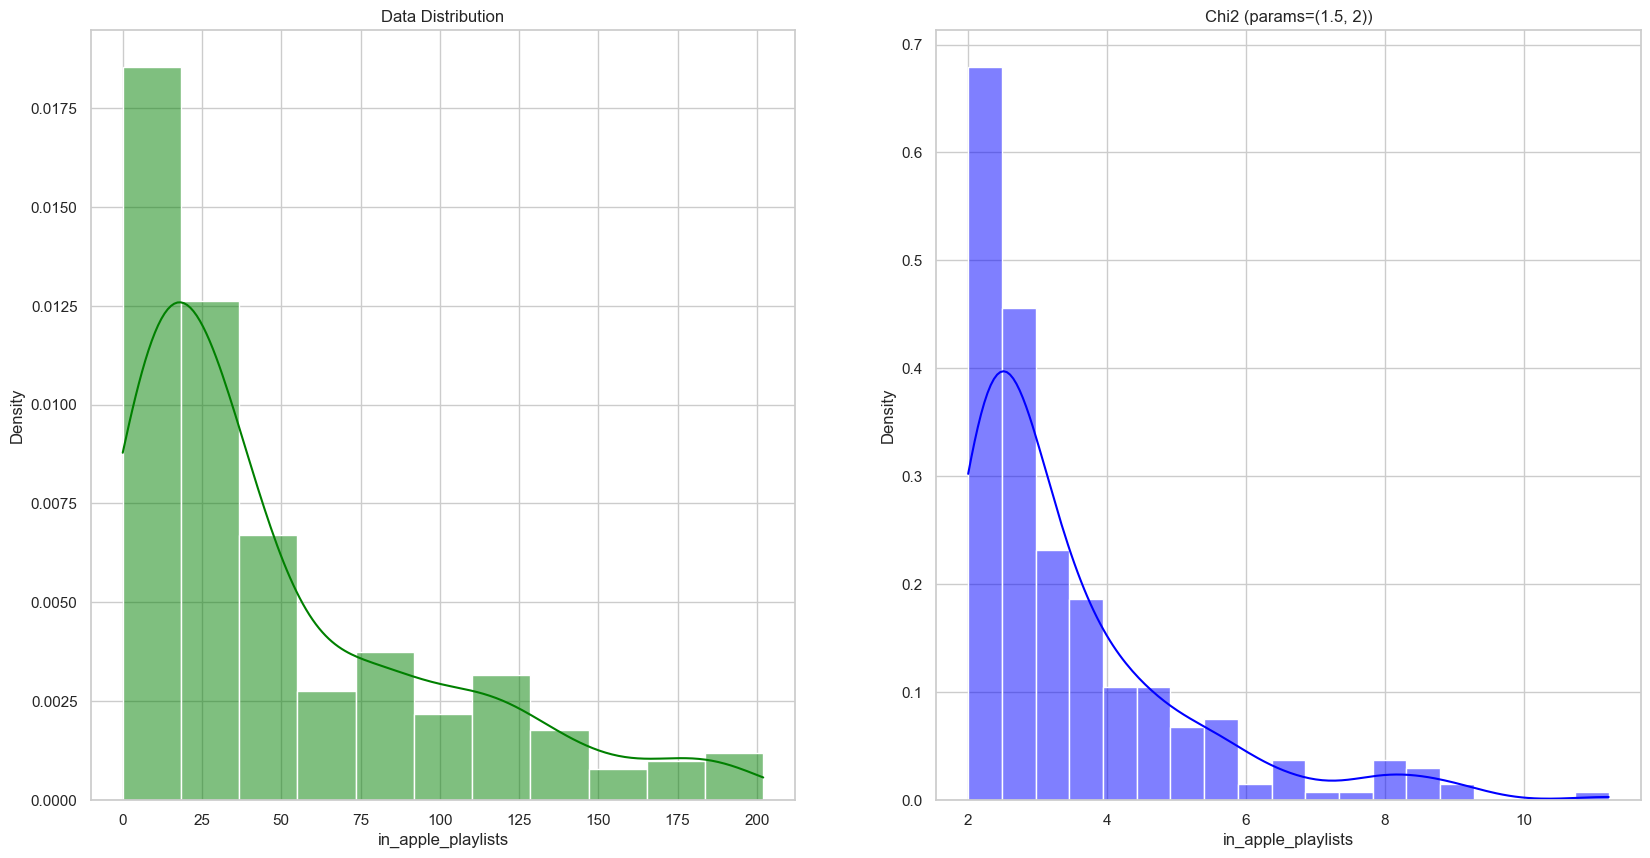

In [14]:
in_apple_playlists_sample = IQR(data['in_apple_playlists'].dropna())
plot_data_and_distribution(in_apple_playlists_sample, chi2, (1.5, 2), 'Chi2', 'in_apple_playlists')


### 4.4 Artist count

For our categorical variable, a beta-binomial distribution would be suitable. However, it's necessary to fix certain parameters to shift the distribution one unit to the right and obtain three possible values. This is a reasonable approach, assuming that we know the discrete variable can take values from a limited set, and we only need to estimate their probabilities.

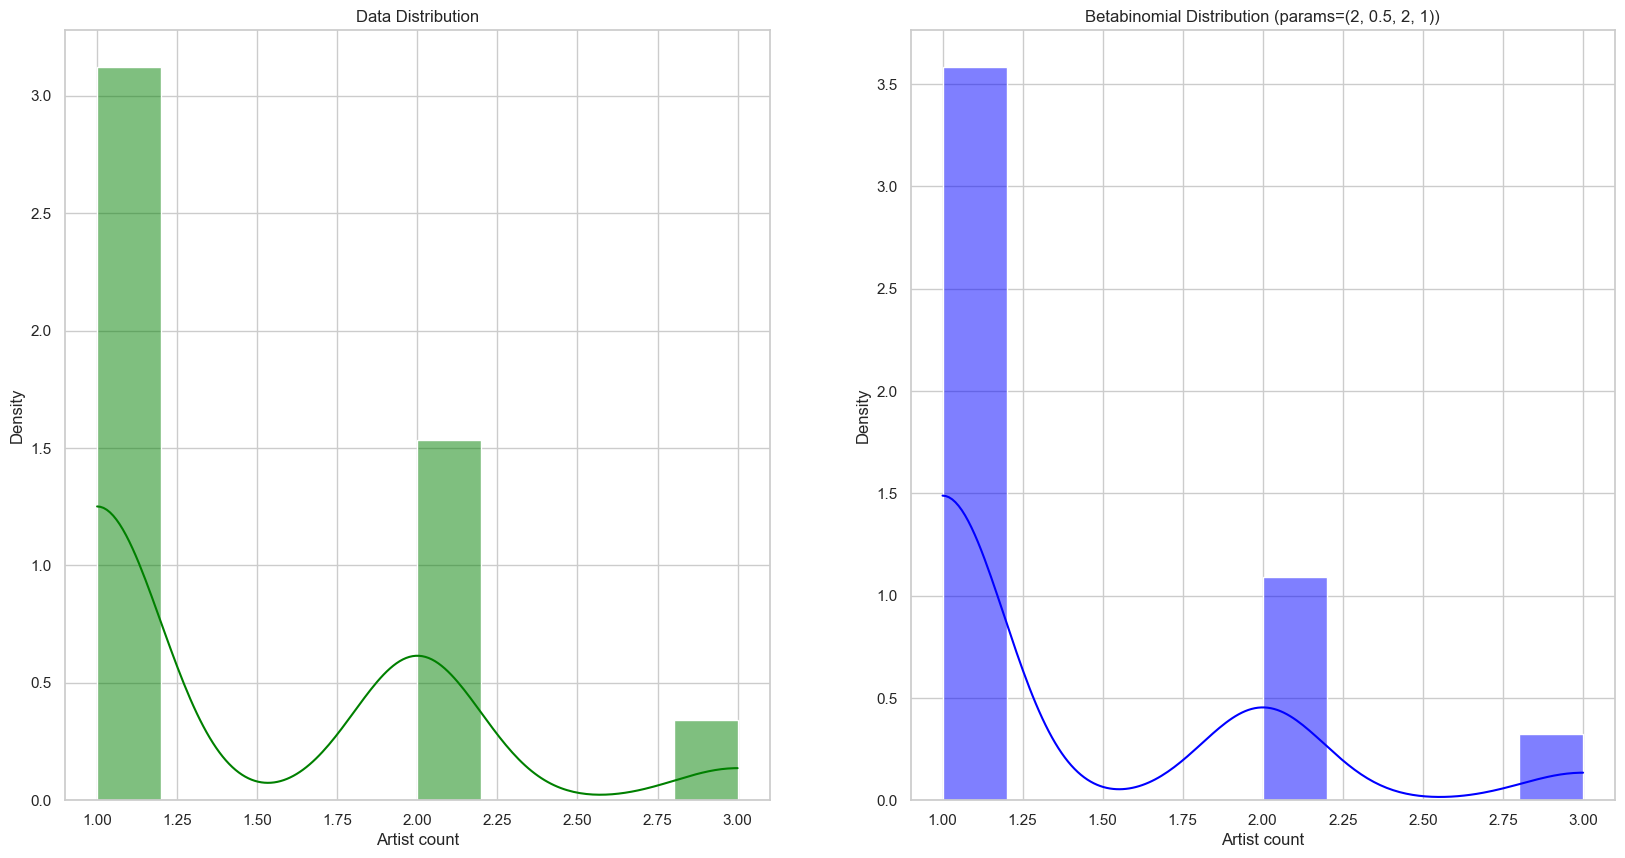

In [15]:
artist_count_sample = IQR(data['artist_count'].dropna())
plot_data_and_distribution(artist_count_sample, stats.betabinom, (2, 0.5, 2, 1), 'Betabinomial Distribution', 'Artist count')


## Step 5, 6, 7

In [16]:
from scipy.optimize import least_squares


The function estimate_parameters(data, distribution, initial_params) calculates two sets of parameters:

Maximum Likelihood Estimation (MLE): Parameters obtained by maximizing the likelihood function of the data given the distribution. This provides the most likely values for the distribution's parameters.

Least Squares Minimization (LSM): Parameters obtained by minimizing the difference between the observed data's histogram and the distribution's probability density function (PDF). This helps in fine-tuning the parameters for a better fit to the data.

The function perform_tests creates quantile-quantile plot to visually compare the data's quantiles against the quantiles of the specified distribution. Deviations from the diagonal line indicate discrepancies between the data and the distribution.


Kolmogorov-Smirnov Test (KS Test): This test quantifies the discrepancy between the empirical distribution function of the data and the cumulative distribution function of the specified distribution. If the p-value is greater than 0.05 (a common significance level), it suggests a good fit between the data and the distribution.

Cramér-von Mises Test: Similar to the KS test, this test measures the discrepancy between the empirical distribution and the theoretical distribution. A p-value above 0.05 indicates a good fit.

In [17]:
def estimate_parameters(data, distribution, initial_params):
    # Maximum Likelihood Estimation (MLE)
    mle_params = distribution.fit(data)

    # Least Squares Minimization (LSM)
    def loss_function(params):
        real_dist, bins = np.histogram(data, bins=100, density=True)
        gen_dist = distribution.pdf(bins[1:], *params)
        return gen_dist - real_dist

    # Minimize the loss function to obtain LSM parameters
    lsm_params = least_squares(loss_function, initial_params, method='trf').x

    return mle_params, lsm_params

def perform_tests(data, distribution, params, title):
    # Create QQ plot
    plt.figure(figsize=(8, 6))
    stats.probplot(data, dist=distribution, sparams=params, plot=plt)
    plt.title(f'QQ Plot for {title}')
    plt.show()

    # Perform Kolmogorov-Smirnov test
    ks_stat, ks_p_value = stats.kstest(data, distribution.cdf, args=params)
    print(f'Kolmogorov-Smirnov Test (KS Test) for {title}:')
    print(f'P-Value: {ks_p_value}')
    if ks_p_value > 0.05:
        print('The distribution fits the data (at 5% significance level)')
    else:
        print('The distribution does not fit the data (at 5% significance level)')

    # Perform Cramér-von Mises test
    cvm_p_value = stats.cramervonmises(data,  distribution.cdf, args=params).pvalue
    print(f'Cramér-von Mises Test for {title}:')
    print(f'P-Value: {cvm_p_value}')
    if cvm_p_value > 0.05:
        print('The distribution fits the data (at 5% significance level)')
    else:
        print('The distribution does not fit the data (at 5% significance level)')


### 5.1. Streams

In [18]:
from sklearn.preprocessing import StandardScaler


Maximum Likelihood Parameters: (1.0496441526888107, -1.0809037868384244, 1.1020238407409932)
Least Squares Parameters: (1.5, -1, 2) [ 0.91608245 -1.00880205  1.10795194]


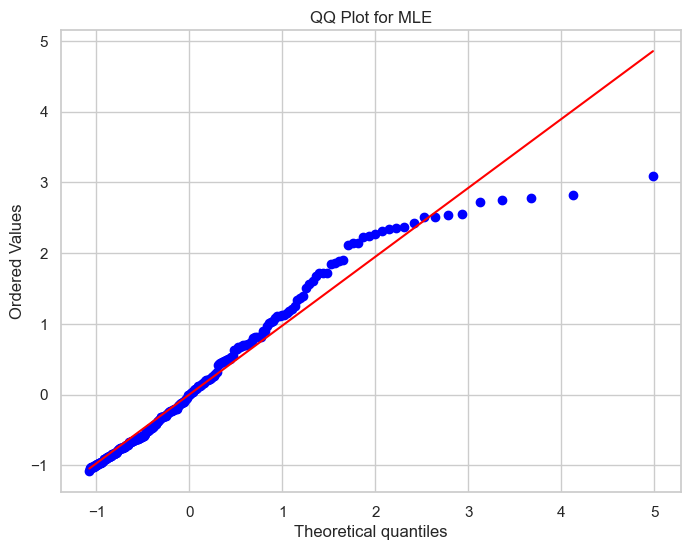

Kolmogorov-Smirnov Test (KS Test) for MLE:
P-Value: 0.35770814031564835
The distribution fits the data (at 5% significance level)
Cramér-von Mises Test for MLE:
P-Value: 0.5280355633943121
The distribution fits the data (at 5% significance level)


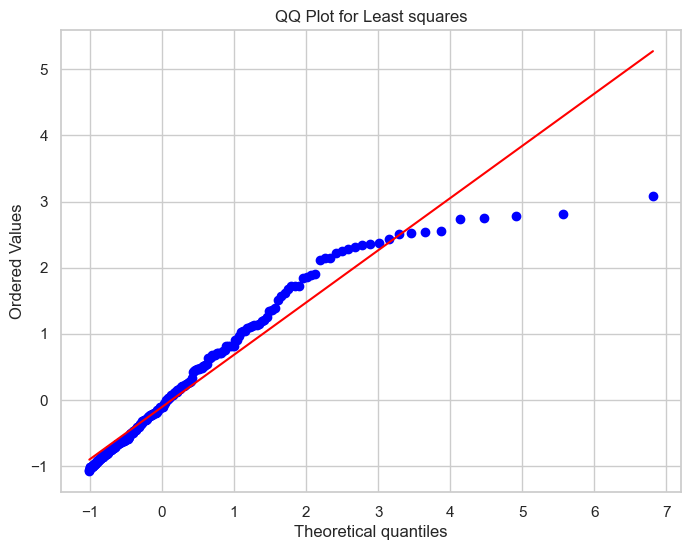

Kolmogorov-Smirnov Test (KS Test) for Least squares:
P-Value: 0.16182902334559357
The distribution fits the data (at 5% significance level)
Cramér-von Mises Test for Least squares:
P-Value: 0.15531593710611313
The distribution fits the data (at 5% significance level)


In [19]:
sample_data = StandardScaler().fit_transform(np.array(streams_sample).reshape(-1, 1)).reshape(-1)
# lse_init = abs(np.random.randn(3))
lse_init = (1.5, -1 , 2)
max_likelihood_params, least_squares_params = estimate_parameters(sample_data, weibull_min, lse_init)

print("Maximum Likelihood Parameters:", max_likelihood_params)
print("Least Squares Parameters:", lse_init, least_squares_params)

perform_tests(sample_data, weibull_min, max_likelihood_params, 'MLE')
perform_tests(sample_data, weibull_min, least_squares_params, 'Least squares')


Here, we observe that the chosen distribution with parameters obtained from both methods effectively describes our data. However, it's worth noting that least squares minimization is highly sensitive to the initial point. Therefore, it is advisable to run the method several times with different initial approximations. Currently, we have fixed the initial point in the code where the algorithm converges well.

#### 5.2. In spotify playlists

Maximum Likelihood Parameters: (0.9937916334084442, -1.0143307270902786, 1.0209133990701416)
Least Squares Parameters: [ 0.78056923 -0.97119187  1.4437318 ]


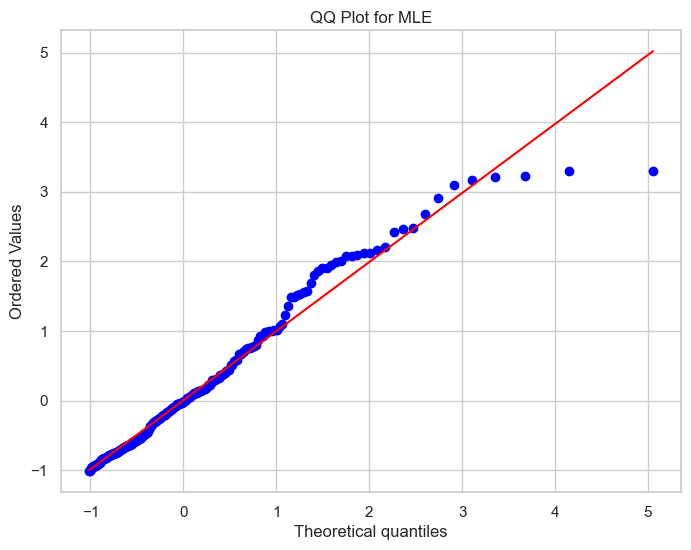

Kolmogorov-Smirnov Test (KS Test) for MLE:
P-Value: 0.6195833722650704
The distribution fits the data (at 5% significance level)
Cramér-von Mises Test for MLE:
P-Value: 0.6000724799521351
The distribution fits the data (at 5% significance level)


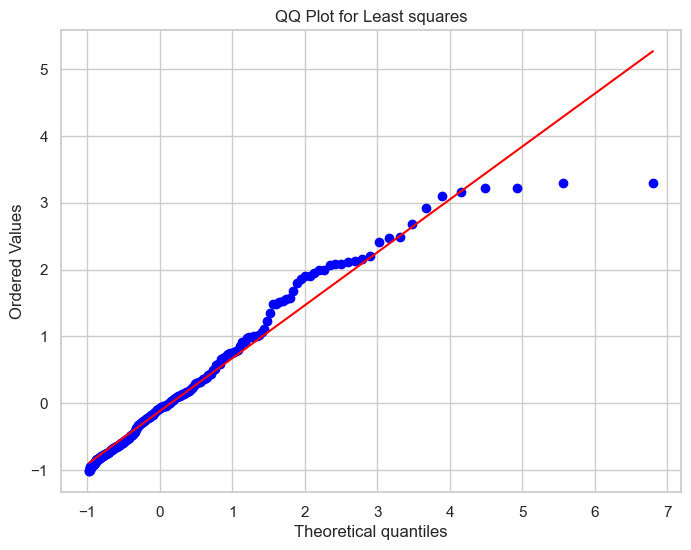

Kolmogorov-Smirnov Test (KS Test) for Least squares:
P-Value: 0.32444070681267045
The distribution fits the data (at 5% significance level)
Cramér-von Mises Test for Least squares:
P-Value: 0.1991521600022127
The distribution fits the data (at 5% significance level)


In [20]:
sample_data = StandardScaler().fit_transform(np.array(in_spot_sample).reshape(-1, 1)).reshape(-1)
lse_init = abs(np.random.randn(3))
max_likelihood_params, least_squares_params = estimate_parameters(sample_data, gamma, lse_init)

print("Maximum Likelihood Parameters:", max_likelihood_params)
print("Least Squares Parameters:", least_squares_params)

perform_tests(sample_data, gamma, max_likelihood_params, 'MLE')
perform_tests(sample_data, gamma, least_squares_params, 'Least squares')


Here, we started from a random point, and the algorithm did not converge, while MLE continued to show excellent results.

#### 5.3. In apple playlist

Maximum Likelihood Parameters: (1.2593121107757335, -1.0021879503260347, 0.9899921472150557)
Least Squares Parameters: [1.8149387  0.13210542 0.85659767] [ 1.23264729 -0.75265769  1.31404668]


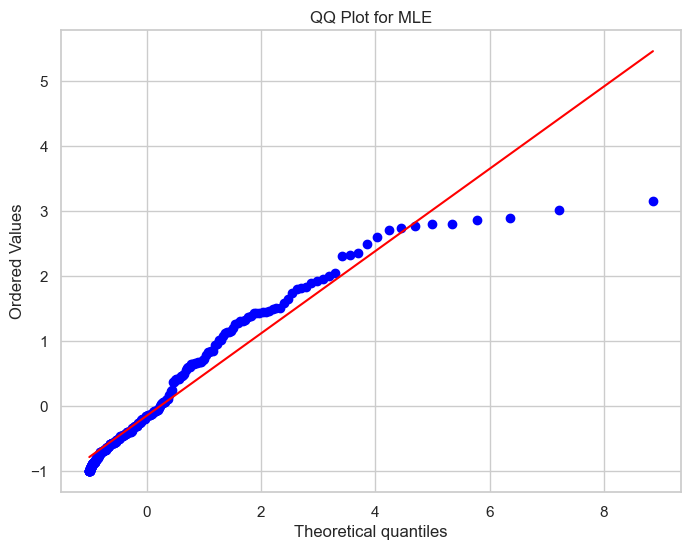

Kolmogorov-Smirnov Test (KS Test) for MLE:
P-Value: 0.12102398701328143
The distribution fits the data (at 5% significance level)
Cramér-von Mises Test for MLE:
P-Value: 0.0413797192199592
The distribution does not fit the data (at 5% significance level)


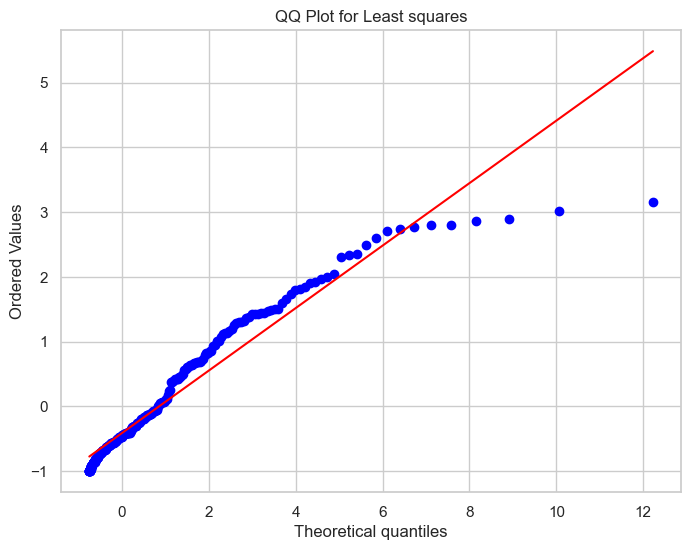

Kolmogorov-Smirnov Test (KS Test) for Least squares:
P-Value: 1.564989753670128e-13
The distribution does not fit the data (at 5% significance level)
Cramér-von Mises Test for Least squares:
P-Value: 2.888795869182559e-10
The distribution does not fit the data (at 5% significance level)


In [21]:
sample_data = StandardScaler().fit_transform(np.array(in_apple_playlists_sample).reshape(-1, 1)).reshape(-1)
lse_init = abs(np.random.randn(3))
max_likelihood_params, least_squares_params = estimate_parameters(sample_data, chi2, lse_init)

print("Maximum Likelihood Parameters:", max_likelihood_params)
print("Least Squares Parameters:", lse_init, least_squares_params)

perform_tests(sample_data, chi2, max_likelihood_params, 'MLE')
perform_tests(sample_data, chi2, least_squares_params, 'Least squares')


For this particular feature, we deliberately chose a different distribution, and as we can see, it does not describe our 'in_apple_count' variable.

Maximum Likelihood Parameters: (0.7366583868930705, -1.0021879503260347, 1.3344080680516348)
Least Squares Parameters: [1.25724165 0.96868608 0.63524529] [ 0.63024805 -0.336772    8.89898735]


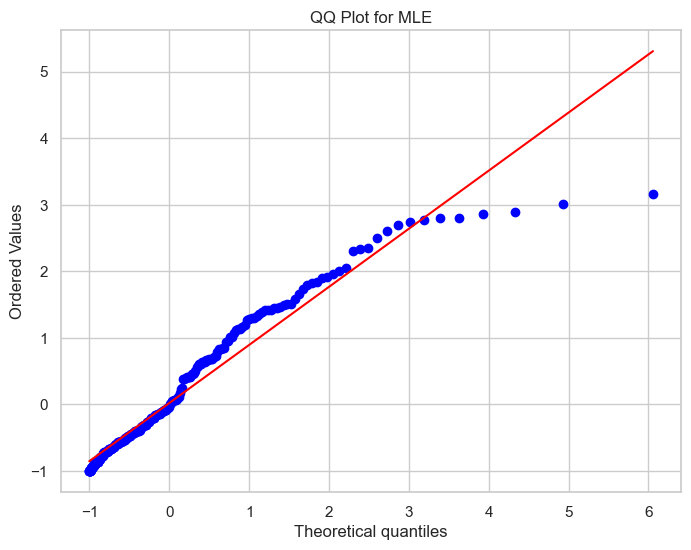

Kolmogorov-Smirnov Test (KS Test) for MLE:
P-Value: 0.055214119445209264
The distribution fits the data (at 5% significance level)
Cramér-von Mises Test for MLE:
P-Value: 0.12551489871064547
The distribution fits the data (at 5% significance level)


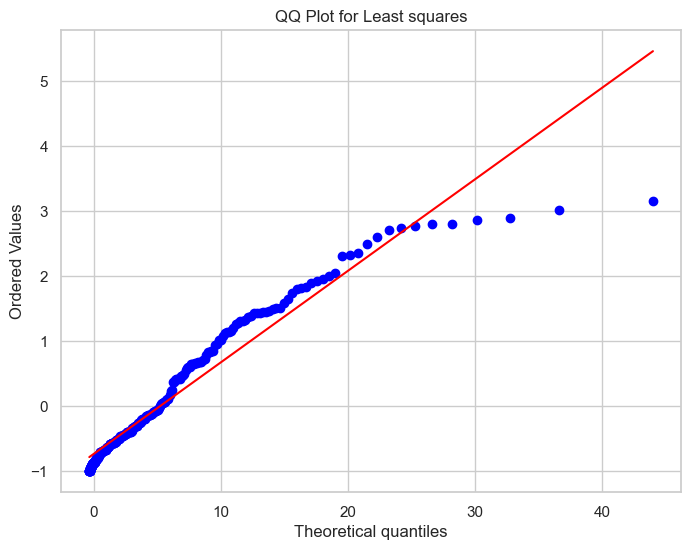

Kolmogorov-Smirnov Test (KS Test) for Least squares:
P-Value: 1.2301523329972543e-73
The distribution does not fit the data (at 5% significance level)
Cramér-von Mises Test for Least squares:
P-Value: 2.1421354357009648e-08
The distribution does not fit the data (at 5% significance level)


In [22]:
sample_data = StandardScaler().fit_transform(np.array(in_apple_playlists_sample).reshape(-1, 1)).reshape(-1)
lse_init = abs(np.random.randn(3))
max_likelihood_params, least_squares_params = estimate_parameters(sample_data, gamma, lse_init)

print("Maximum Likelihood Parameters:", max_likelihood_params)
print("Least Squares Parameters:", lse_init, least_squares_params)

perform_tests(sample_data, gamma, max_likelihood_params, 'MLE')
perform_tests(sample_data, gamma, least_squares_params, 'Least squares')


But we can still choose a gamma distribution and achieve good results.

#### 5.4. Artist count

For the discrete distribution, let's make slight modifications to the code and utilize the chi-square test and G test.

In [23]:
def estimate_parameters_direct(data, distribution, initial_params):
    def negative_log_likelihood(params):
        params = [2] + list(params) + [1]
        log_likelihood = -np.sum(distribution.logpmf(data, *params))
        return log_likelihood

    mle_params = minimize(negative_log_likelihood, initial_params, method='Nelder-Mead', tol=1e-6).x

    def loss_function(params):
        params = [2] + list(params) + [1]

        unique, counts = np.unique(data, return_counts=True)
        expected_freq = len(data) * distribution.pmf(unique, *params)

        mse_loss = np.mean((expected_freq - counts) ** 2)
        return mse_loss

    lsm_params = minimize(loss_function, initial_params, method='Nelder-Mead', tol=1e-6).x
    return mle_params, lsm_params


def perform_tests_discrete(data, distribution, params, title):
    # Create QQ plot
    plt.figure(figsize=(8, 6))
    stats.probplot(data, dist=distribution, sparams=params, plot=plt)
    plt.title(f'QQ Plot for {title}')
    plt.show()

    # Perform Chi-squared test
    unique, counts = np.unique(data, return_counts=True)
    expected_freq = len(data) * stats.betabinom.pmf(unique, *params)
    chi2_stat, chi2_p_value = stats.chisquare(counts, expected_freq)

    print(f'Chi-squared Test for {title}:')
    print(f'P-Value: {chi2_p_value}')
    if chi2_p_value > 0.05:
        print('The distribution fits the data (at 5% significance level)')
    else:
        print('The distribution does not fit the data (at 5% significance level)')

    # Perform G test
    g_value, g_test_p = stats.power_divergence(counts, expected_freq, lambda_='log-likelihood')
    print(f'G Test for {title}:')
    print(f'P-Value: {g_test_p}')
    if g_test_p > 0.05:
        print('The distribution fits the data (at 5% significance level)')
    else:
        print('The distribution does not fit the data (at 5% significance level)')


Maximum Likelihood Parameters: [2, 1.7889910706872716, 6.27523034585796, 1]
Least Squares Parameters: [2, 1.7889908566498545, 6.275229483634783, 1]


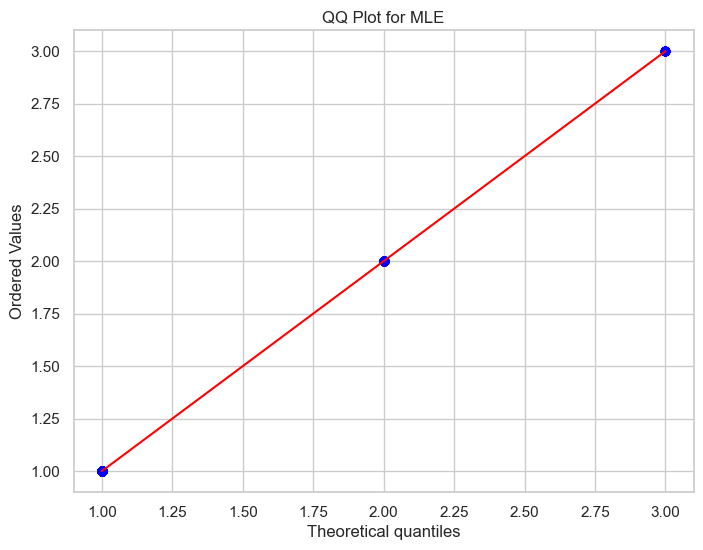

Chi-squared Test for MLE:
P-Value: 0.9999999999999558
The distribution fits the data (at 5% significance level)
G Test for MLE:
P-Value: 1.0
The distribution fits the data (at 5% significance level)


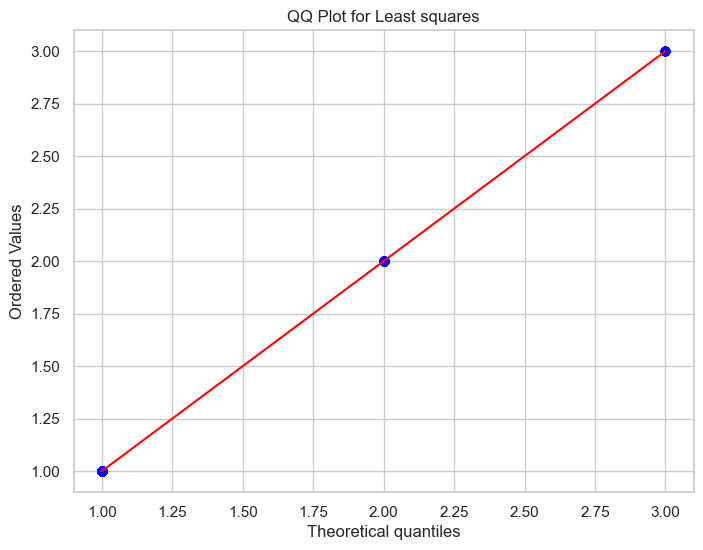

Chi-squared Test for Least squares:
P-Value: 0.9999999999999992
The distribution fits the data (at 5% significance level)
G Test for Least squares:
P-Value: 0.9999999999999931
The distribution fits the data (at 5% significance level)


In [24]:
max_likelihood_params, least_squares_params = estimate_parameters_direct(artist_count_sample, stats.betabinom, (0.5,  0.5))

max_likelihood_params = [2] + list(max_likelihood_params) + [1]
least_squares_params = [2] + list(least_squares_params) + [1]

print("Maximum Likelihood Parameters:", max_likelihood_params)
print("Least Squares Parameters:", least_squares_params)


perform_tests_discrete(artist_count_sample, stats.betabinom, max_likelihood_params, 'MLE')
perform_tests_discrete(artist_count_sample, stats.betabinom, least_squares_params, 'Least squares')


As we can see, the chosen distribution fits perfectly.

### Conclusion

In this study, we applied a systematic approach to analyzing our dataset. Initially, we used kernel density estimation (KDE) to assess the distribution of the data and employed box plots to evaluate order statistics and the intervals within which they can vary.

Subsequently, we identified theoretically similar distributions capable of describing our data. We estimated the parameters of these distributions to ensure they fit our dataset. The process revealed that the method of least squares is sensitive to the choice of the initial point, while Maximum Likelihood Estimation (MLE) proved to be more stable.

For instance, in the case of the 'apple_cnt' feature, we demonstrated that visually similar distributions might not always be suitable. We then identified an appropriate distribution that accurately represented our data.

When dealing with categorical variables, we refrained from applying tests designed for continuous variables. Instead, we modified our code to utilize appropriate tests for categorical data, namely the chi-square test and the G test.

In summary, our study highlighted the importance of careful selection and evaluation of theoretical distributions when modeling real-world data. It emphasized the significance of understanding the limitations of different statistical methods, such as the sensitivity of the least squares method to the initial point. Through this rigorous analysis, we were able to identify distributions that accurately capture the underlying patterns in our data, providing a solid foundation for further statistical analyses and interpretations.